This file is used to draw the 2D plot of the beam profile and phase distribution as plotted in th Si of paper "Generating optical vortex beams by momentum-space polarization vortices centred at bound states in the continuum", the input is RCP light, and the picture is for LCP light

In [66]:
import sys
sys.path.append('..')
import math
import numpy as np
import scipy.constants as C
import lumapi
from Polarization.extract_polar import extrac_polar
from Polarization.set_angle import set_angle
%load_ext autoreload
%autoreload 2

path = 'D:\\polarization_control\\Square2D_new'
fdtd = lumapi.FDTD(filename = path)

f = 563.52e12 # in Hz unit
a = 380e-9 # dimension m
sym = 2 # The symmetry of structure used to shorten the simulation
k_unit = 2 * math.pi / a
omega = 2 * math.pi * f
norm_k =  omega / C.speed_of_light
theta_range = 10 # The range of sampled theta points, maximum theta in degree
num_t, num_p = 1, 5 # number of sampled point in theta and phi

theta = np.flip(np.linspace(theta_range, 0, num_t, endpoint = False)) # in degree
phi = np.linspace(0, 360/sym, num_p, endpoint = False) # in degree
coeff = [] # will store the coeffecient of the lcp and rcp light in [[(t_1, p_1), (t_1, p_1)...], [(t_2, p_1)...]...] manner

for theta_i in theta:
    tmp = [] # store the lcp and rcp light coeffecient for theta_i
    for phi_i in phi:
        kp = set_angle(fdtd, theta_i, phi_i) # in bandstructure unit
        k_p = k_unit * kp
        fdtd.run()
        polar = extrac_polar(fdtd, 'monitor_xy_1', omega, k_p)

        tmp.append(polar)
        sys.stdout.write('.')
    coeff.append(tmp)
    sys.stdout.write('\n')
print('')
fdtd.close()

..

Process the data, beacuse the symmetry of test case, we only need to calculate the 1/8 of the total Phi range and can expand the data to get the full result

In [64]:
coeff_f = np.append(coeff, coeff, axis = 1)
phi = np.linspace(0, 2*np.pi, sym*num_p, endpoint = False) # in degree
rad = np.sin(np.pi / 180 * theta)
r, p = np.meshgrid(rad,  phi)
angle = np.angle(coeff_f)
trans = np.abs(coeff_f)

Plot the figure

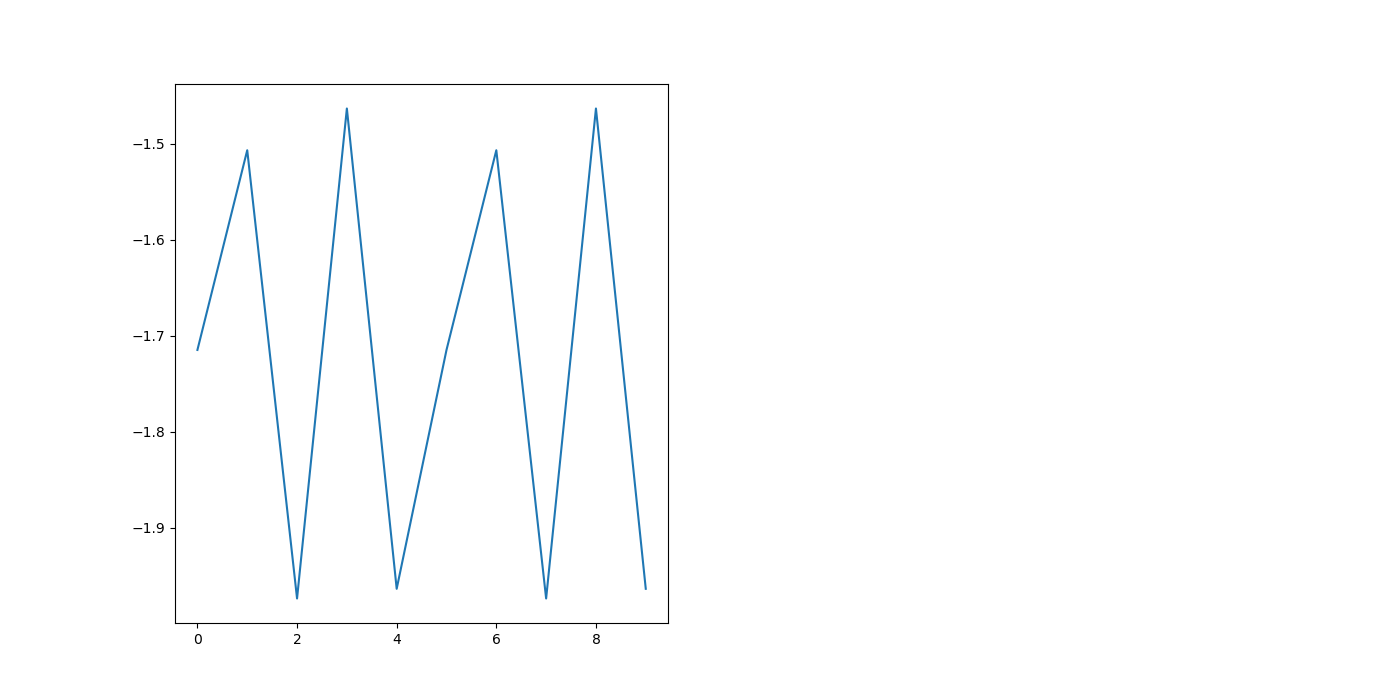

In [65]:
import matplotlib.pyplot as plt
%matplotlib widget
# coeff_1 = np.load('coeff_532nm_xy.npy')
# coeff_2 = np.load('coeff_532nm_xy_nostruct.npy')
# coeff = coeff_1[:, :, 0, 0] / coeff_2[:, :, 1, 0]
# angle = np.angle(coeff_2)
# trans = np.abs(coeff) ** 2

fig = plt.figure(figsize=(14,7))
# ax = fig.add_subplot(121, projection = 'polar')
# polar_plot = ax.pcolormesh(p, r, np.transpose(angle[:, :]), cmap = 'afmhot')
# plt.colorbar(polar_plot, shrink = .6, pad = .08, )

ax = fig.add_subplot(121)
ax.plot(angle[0, :, 0])

In [47]:
np.save('coeff_532nm_xy_nostruct', coeff_f)

In [47]:
tmp = np.array([[1, 2], [3, 4]])
np.array([tmp[:, :], tmp[:-1, :-1]])

C:\Users\RUHUAN~1\AppData\Local\Temp/ipykernel_14964/641987443.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([tmp[:, :], tmp[:-1, :-1]])


array([array([[1, 2],
              [3, 4]]), array([[1]])], dtype=object)

In [53]:
trans.max()

0.24563545948320184